In [1]:
!gdown 1yKll2Vg_mRRrNP_yrUaGr53y1VZMygQo

Downloading...
From: https://drive.google.com/uc?id=1yKll2Vg_mRRrNP_yrUaGr53y1VZMygQo
To: /content/data.xlsx
100% 1.01M/1.01M [00:00<00:00, 42.6MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('data.xlsx')

# Head and Info

In [5]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
# convert date-time cols to datetime64[ns]
present_date = '2200-12-31 00:00:00'
df['DOL'] = pd.to_datetime(df['DOL'].apply(lambda x: present_date if x == 'present' else x))

## **Edit Column  Names**

In [8]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'])
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [9]:
import re

def pascal_to_snake(name):
  name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
  name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()
  name = re.sub(r'(\d+)([a-zA-Z]+)', r'\1_\2', name)
  name = re.sub(r'([a-zA-Z]+)(\d+)', r'\1_\2', name)
  return name


new_cols = []

for col in df.columns:
  snake_case_col = pascal_to_snake(col)
  new_cols.append(snake_case_col)

df.columns = new_cols
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'job_city', 'gender', 'dob',
       '10_percentage', '10_board', '12_graduation', '12_percentage',
       '12_board', 'college_tier', 'degree', 'specialization', 'college_gpa',
       'college_city_tier', 'college_state', 'graduation_year', 'english',
       'logical', 'quant', 'domain', 'computer_programming',
       'electronics_and_semicon', 'computer_science', 'mechanical_engg',
       'electrical_engg', 'telecom_engg', 'civil_engg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## **Finding Outliers**

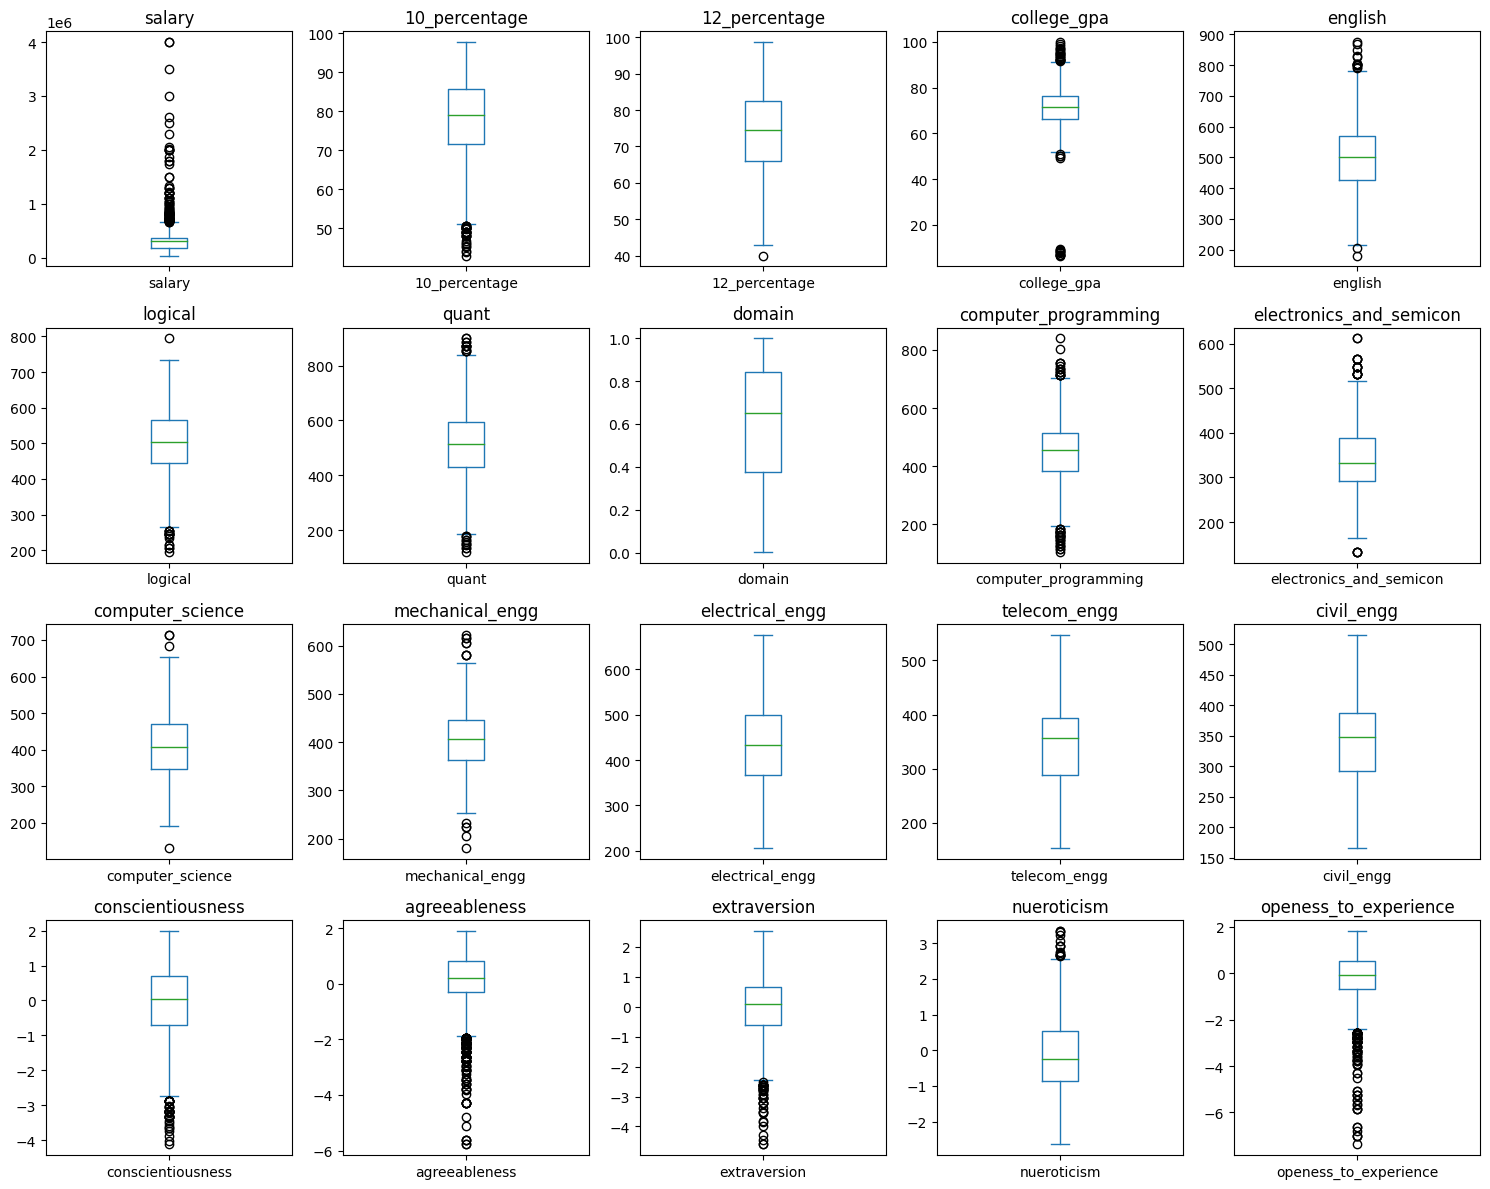

In [10]:
CATEGORICAL = ['12_graduation', 'college_tier', 'college_city_tier', 'graduation_year']

num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)
rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

i = 0
for colname in num_cols:
  if colname in CATEGORICAL:
    continue
  col = df[colname][df[colname] != -1]
  plt.sca(axes[i])
  col.plot(kind='box')
  plt.title(colname)
  i += 1

for i in range(len(num_cols), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [11]:
OUTPUT_COLS = ['max', 'min', 'max_nonoutlier', 'min_nonoutlier', 'count_outlier', 'mean', 'median']
CATEGORICAL = ['12_graduation', 'college_tier', 'college_city_tier', 'graduation_year']
CAN_HAVE_NEG_VAL = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

def non_outlier_values(series, col):
    # remove -1 from the series: -1 means N/A
    series = series[series != -1]
    # find iqr only on applicable vals
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    non_outliers = df[
        (df[col] >= lower_bound) &
        (df[col] <= upper_bound)
    ][col]
    max, min = non_outliers.max(), non_outliers.min()
    return min, max


def compute_stats(df):
    stats = []
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        series = df[col]
        presc = "%.2f" if (col not in CATEGORICAL) else "%.0f"
        # remove -1 from series if val can't be -ve
        if col not in CAN_HAVE_NEG_VAL:
            series = series[series != -1]
        min_val        = presc % series.min()
        max_val        = presc % series.max()
        min_nonoutlier = presc % non_outlier_values(series, col)[0]
        max_nonoutlier = presc % non_outlier_values(series, col)[1]
        count_outlier  = df[
            (df[col] < non_outlier_values(series, col)[0]) |
            (df[col] > non_outlier_values(series, col)[1])
        ].shape[0]
        mean_val       = presc % series.mean()   if (col not in CATEGORICAL) else "N/A"
        median_val     = presc % series.median() if (col not in CATEGORICAL) else "N/A"
        stats.append([max_val, min_val, max_nonoutlier, min_nonoutlier, count_outlier, mean_val, median_val])
    return pd.DataFrame(stats, columns=OUTPUT_COLS, index=numeric_cols)


compute_stats(df)

,max,min,max_nonoutlier,min_nonoutlier,count_outlier,mean,median
salary,4000000.00,35000.00,655000.00,35000.00,109,307699.85,300000.00
10_percentage,97.76,43.00,97.76,51.00,30,77.93,79.15
12_graduation,2013,1995,2012,2004,45,N/A,N/A
12_percentage,98.70,40.00,98.70,43.00,1,74.47,74.40
college_tier,2,1,2,2,297,N/A,N/A
college_gpa,99.93,6.45,91.20,51.80,38,71.49,71.72
college_city_tier,1,0,1,0,0,N/A,N/A
graduation_year,2017,0,2017,2009,2,N/A,N/A
english,875.00,180.00,780.00,215.00,15,501.65,500.00
logical,795.00,195.00,735.00,265.00,18,501.60,505.00


# Freq Distr

## Categorical

In [12]:
CATEGORICAL = ['12_graduation', 'college_tier', 'college_city_tier', 'graduation_year']
CAN_HAVE_NEG_VAL = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

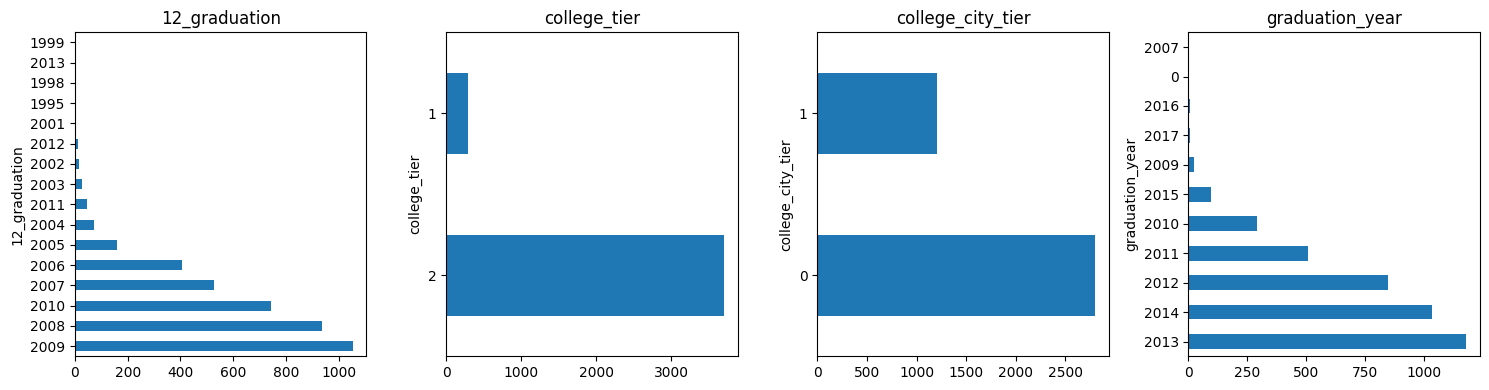

In [13]:
rows = 1
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 4))
axes = axes.flatten()

i = 0
for colname in CATEGORICAL:
  plt.sca(axes[i])
  df[colname].value_counts().plot(kind='barh')
  plt.title(colname)
  i += 1

for i in range(len(CATEGORICAL), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Overwhelming majority comes from tier 2 colleges
- Majority have graduated from college after 2010
- Majority have passed school (12th) after 2006

In [14]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace('[^a-zA-Z0-9 ]', '', regex=True)
    df[col] = df[col].str.replace(' +', ' ', regex=True)
    df[col] = df[col].str.strip()

In [15]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 20)

Column: designation
['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' 'net developer'
 'production engineer' 'jr software engineer' 'trainee software developer'
 'ui developer' 'assistant system engineer' 'android developer'
 'customer service' 'test engineer' 'java developer' 'engineer'
 'recruitmen

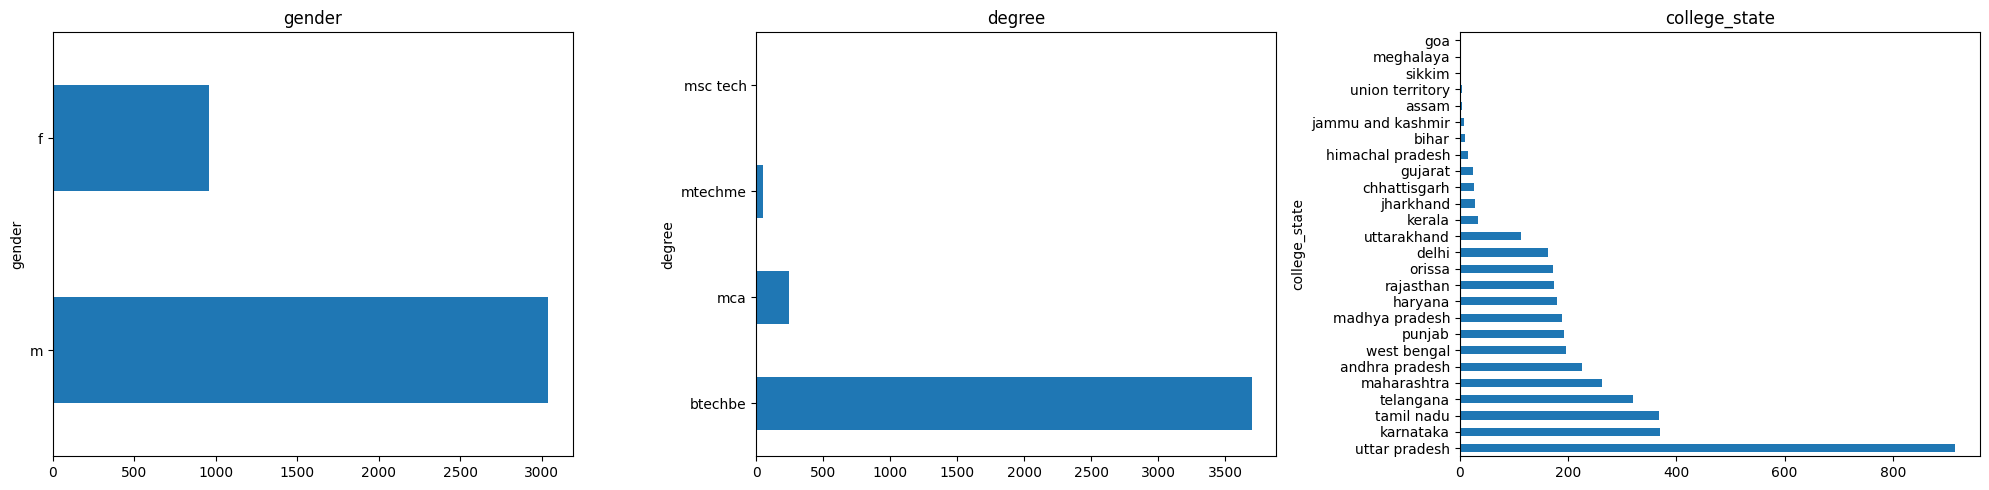

In [16]:
TOO_MANY_CLASSES = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 30]

rows = 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

i = 0
for colname in df.columns:
  if colname in TOO_MANY_CLASSES:
    continue
  if df[colname].dtype == 'object':
    plt.sca(axes[i])
    df[colname].value_counts().plot(kind='barh')
    plt.title(colname)
    i += 1

for i in range(len([col for col in df.columns if df[col].dtype == 'object']), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Male majority
- B. Tech. / B.E. majority
- Overwhelmig majority of employees from Uttar Pradesh

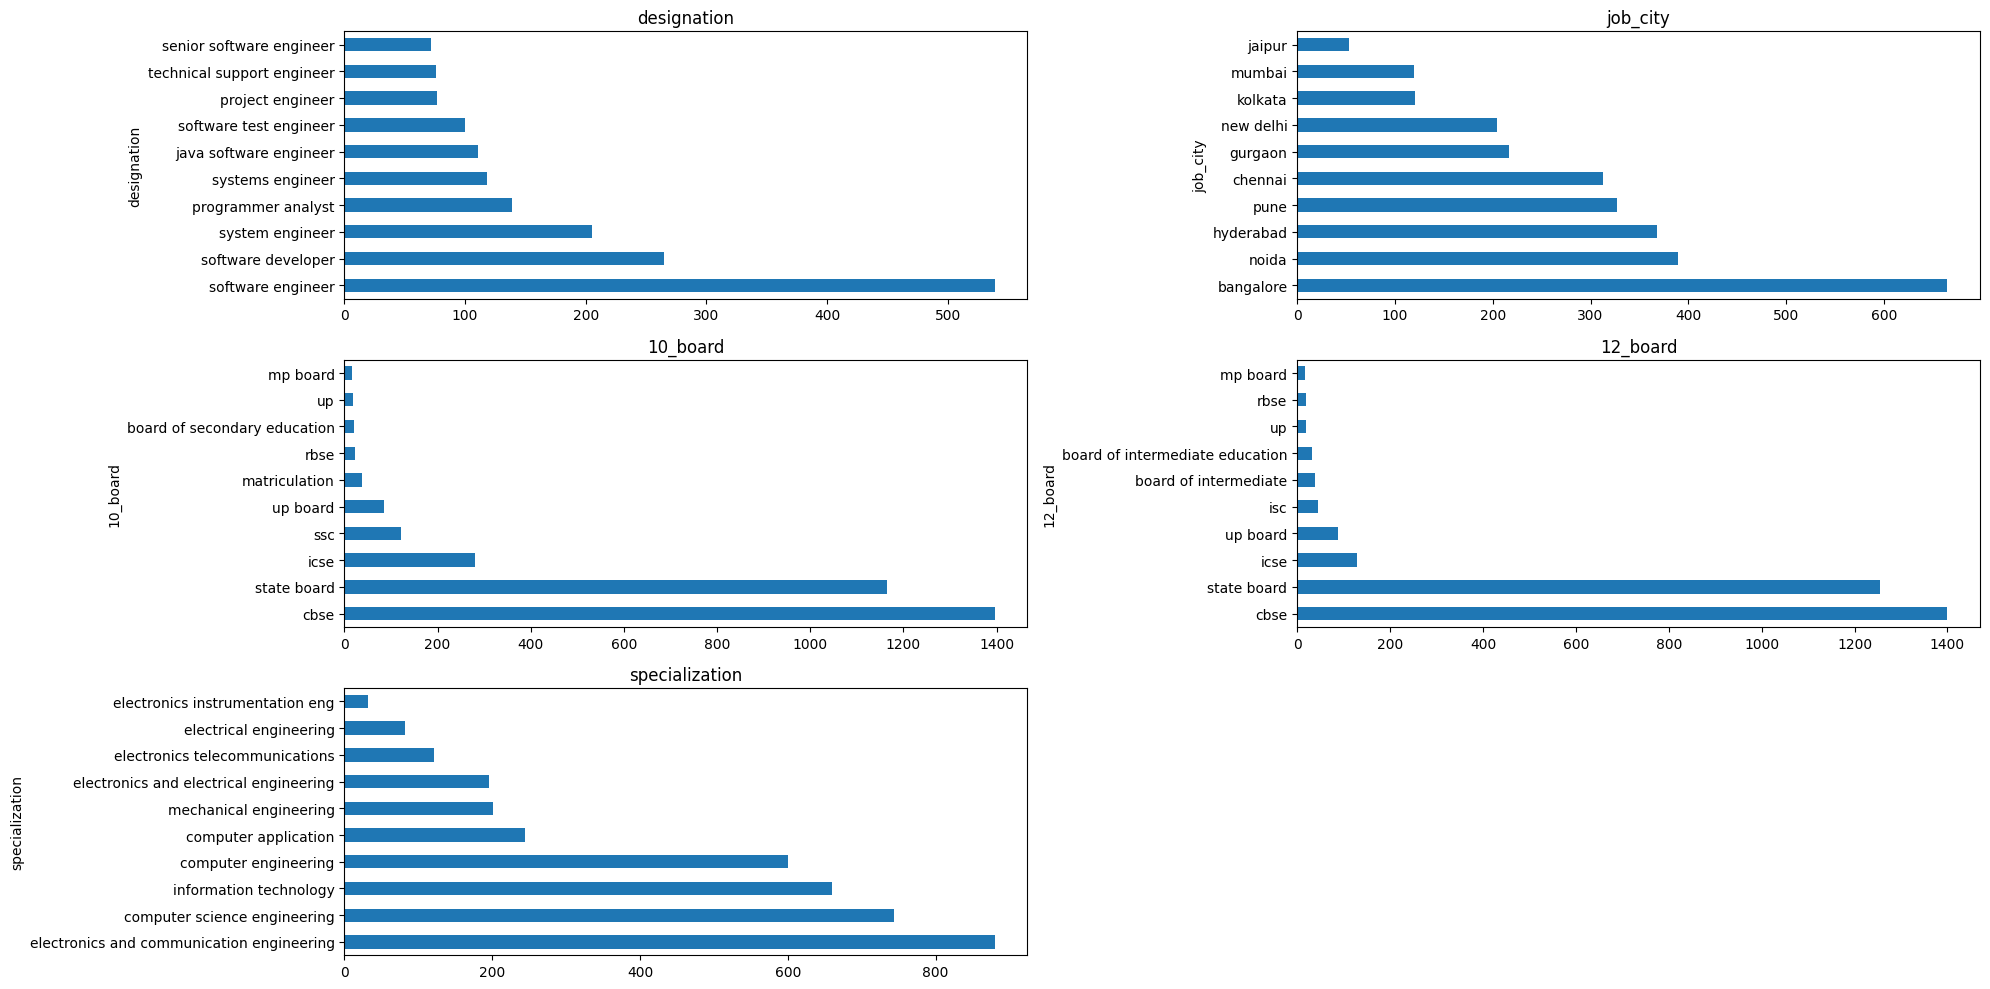

In [17]:
import matplotlib.pyplot as plt
rows = 3
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

i = 0
for colname in TOO_MANY_CLASSES:
  plt.sca(axes[i])
  # plot 10 most frequent classes
  df[colname].value_counts().nlargest(10).plot(kind='barh')
  plt.title(colname)
  i += 1

for i in range(len(TOO_MANY_CLASSES), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Top 10 designation fall under the IT/Software domain
- Bangalore has most job centers
- Among top 10 specializations, ECE, CSE, IT and Computer Engineering have most people
- Overwhelming majority come from state and CBSE boards

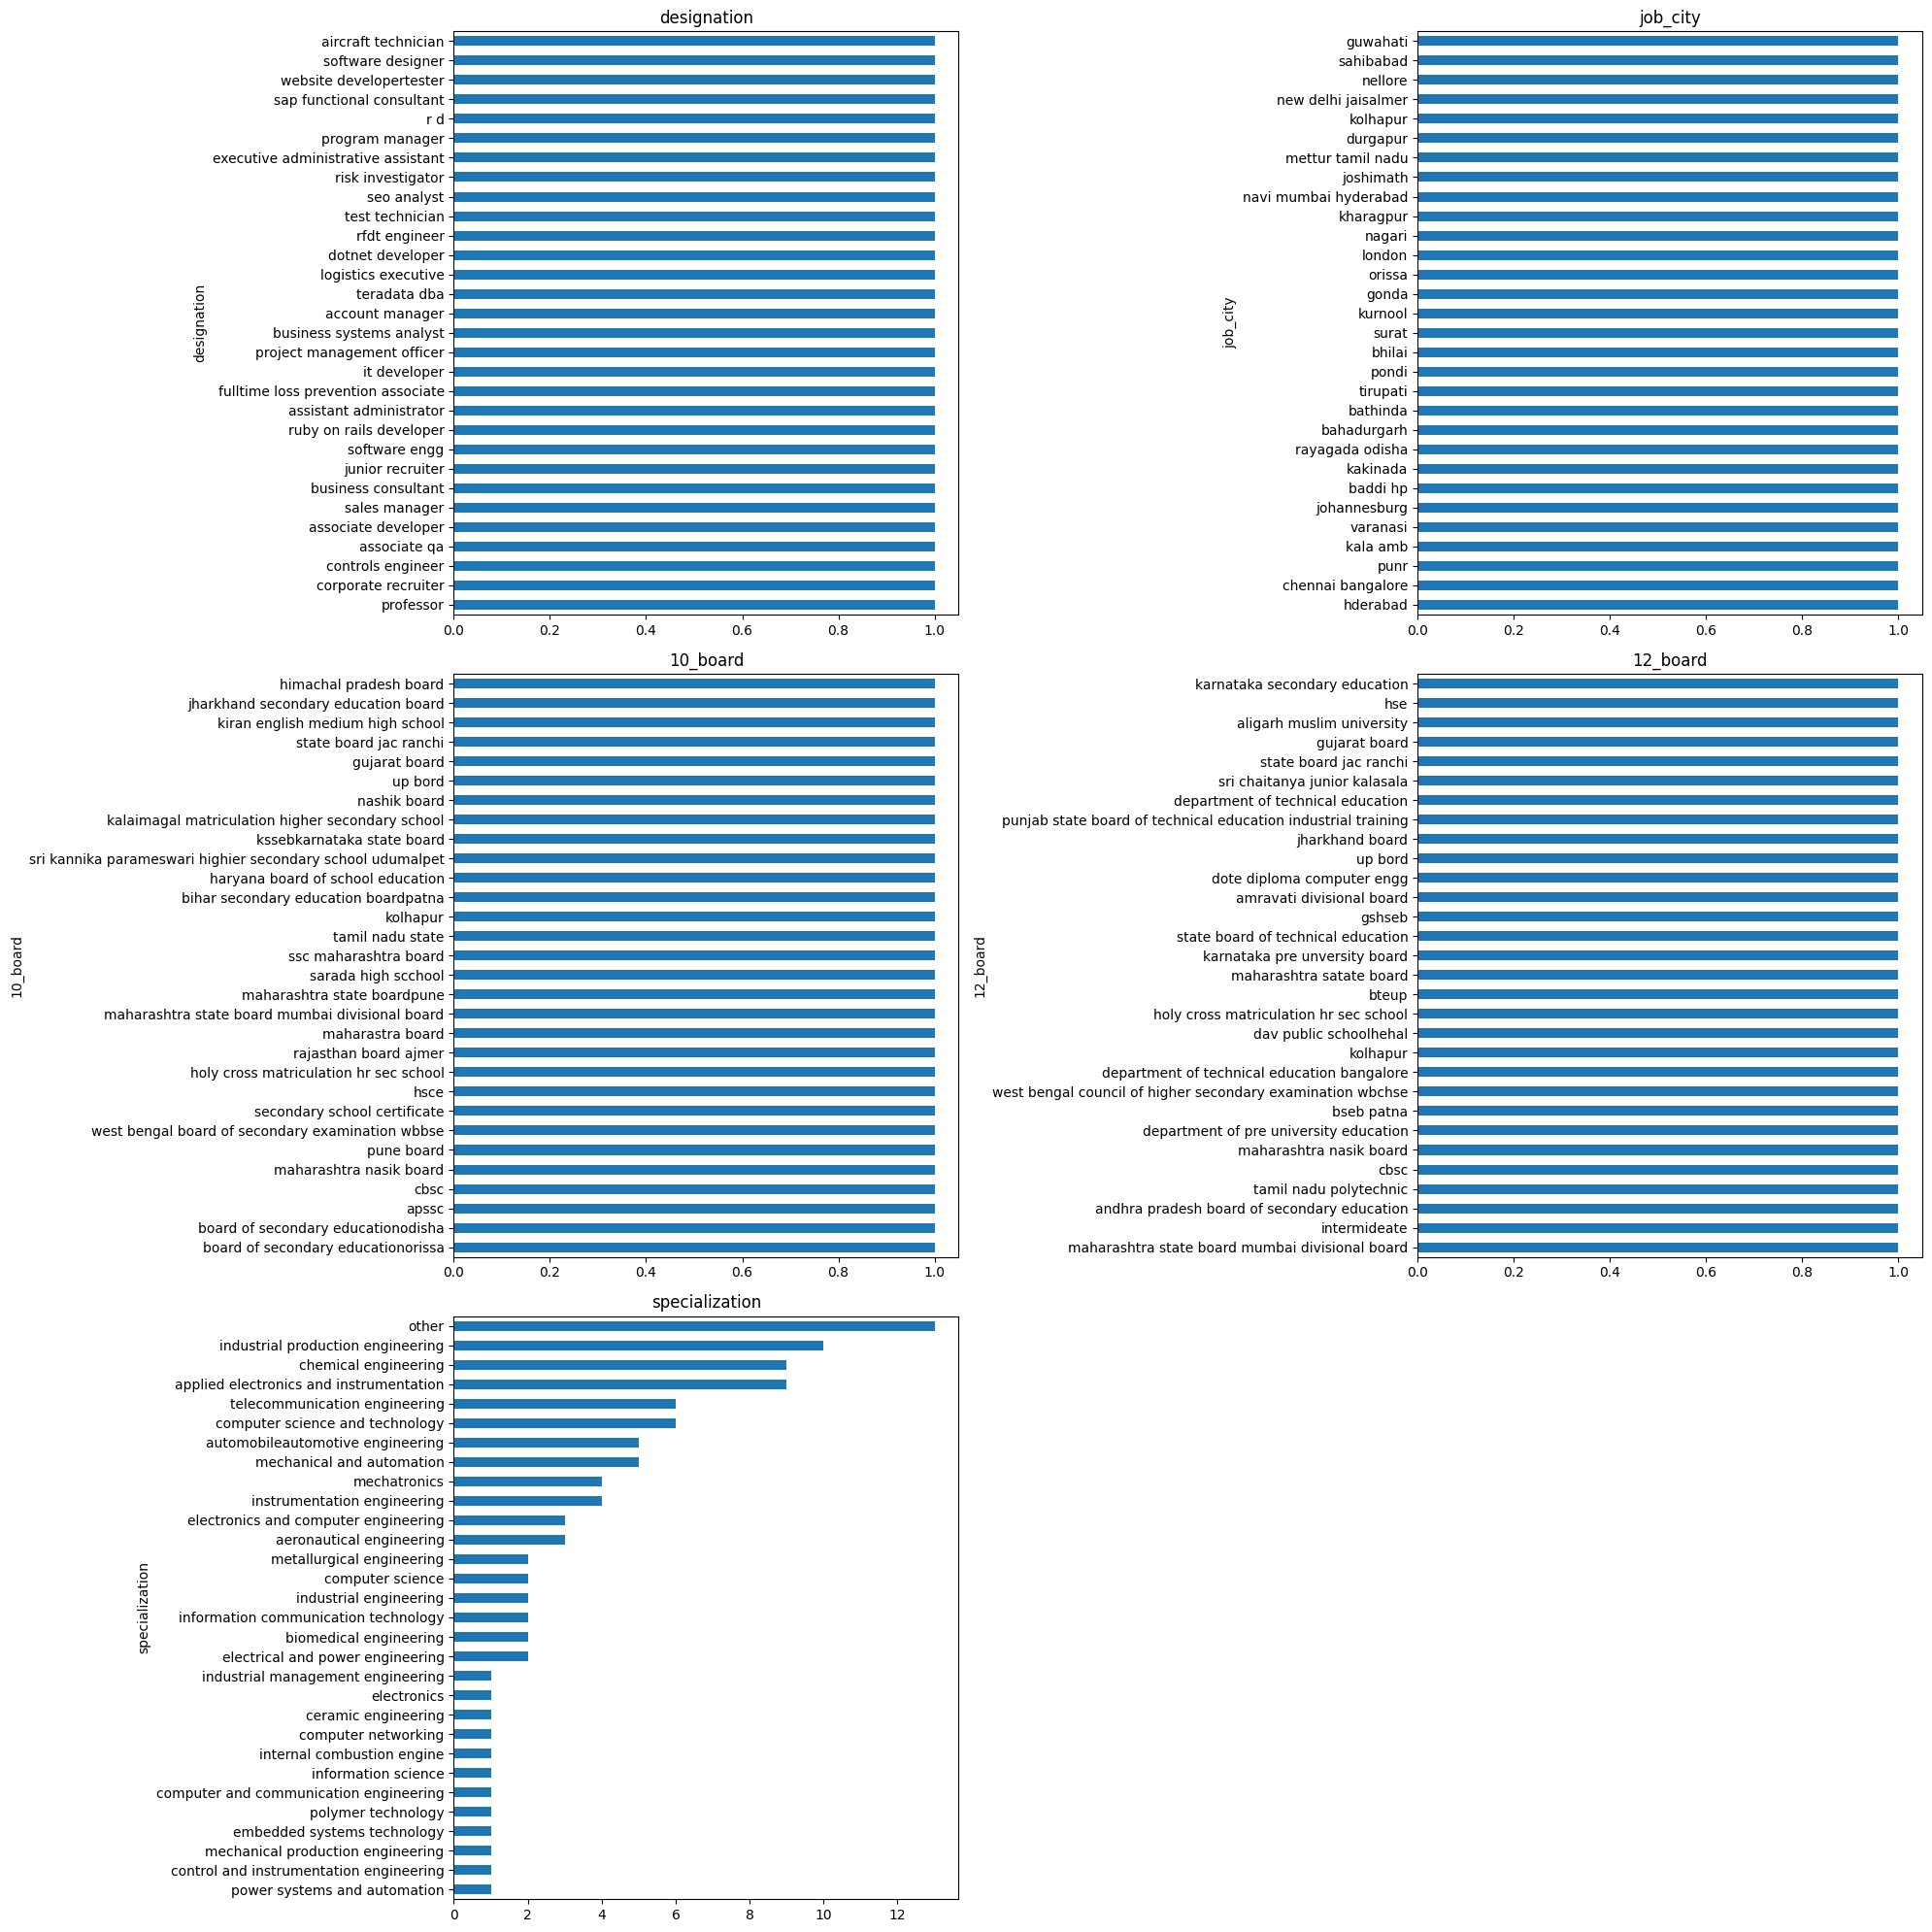

In [18]:
import matplotlib.pyplot as plt
rows = 3
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

i = 0
for colname in TOO_MANY_CLASSES:
  plt.sca(axes[i])
  df[colname].value_counts().nsmallest(30).plot(kind='barh')
  plt.title(colname)
  i += 1

for i in range(len(TOO_MANY_CLASSES), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Numeric

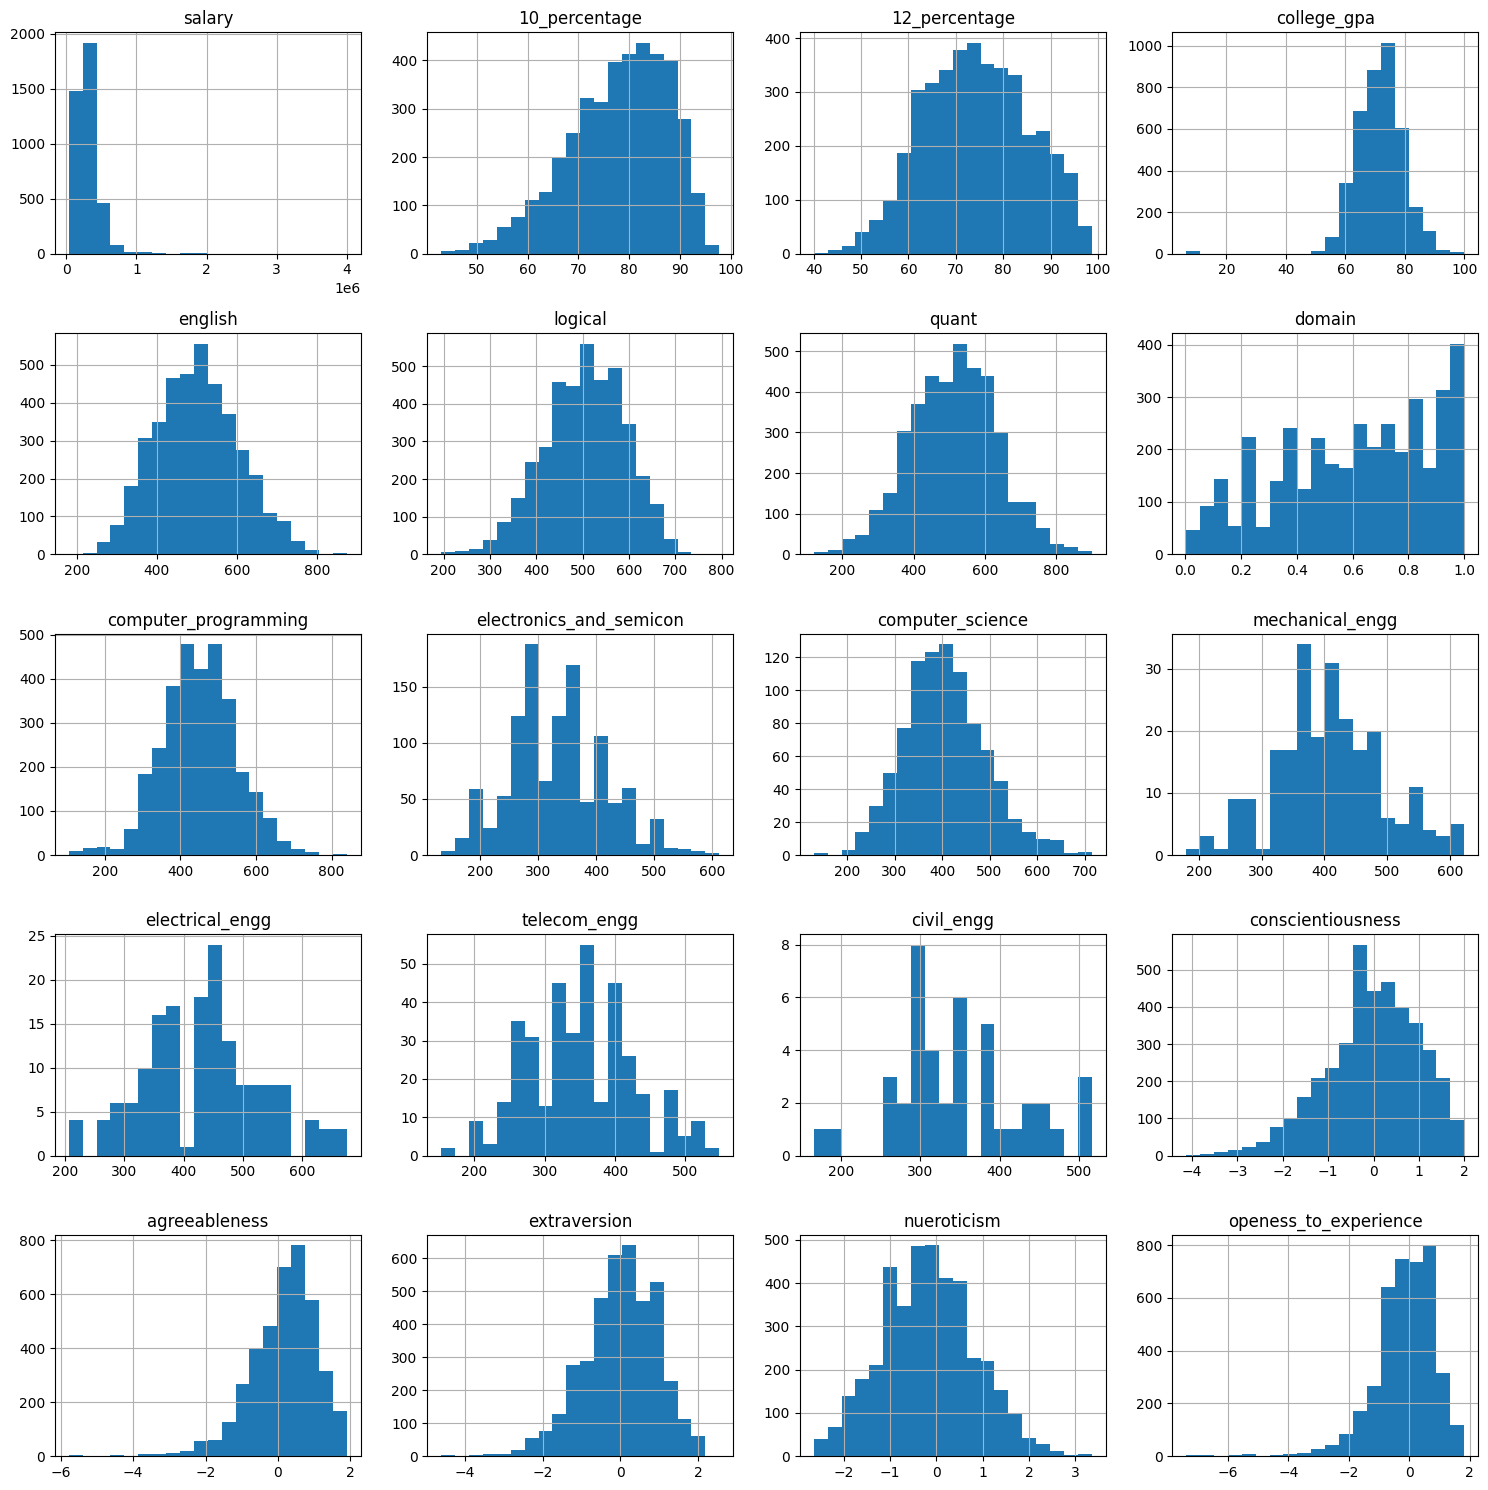

In [19]:
num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)
rows = 5
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

i = 0
for col in num_cols:
    if col in CATEGORICAL:
        continue
    plt.sca(axes[i])
    series = df[col]
    if col not in CAN_HAVE_NEG_VAL:
        series = series[series != -1]
    series.hist(ax=axes[i], bins=20)
    plt.title(col)
    i += 1

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [20]:
OUTPUT_COLS = ['mode_range', '20th to 60th %ile', 'skew', 'mean_median_rel']


def calc_mode(series, col):
    if series.dtype == 'object' or col in CATEGORICAL:
        # If categorical, return the mode
        return series.mode().iloc[0]
    else:
        # If numerical, create bins and return the bin with most data points
        num_bins = 20
        binned_series = pd.cut(series, bins=num_bins)
        most_frequent_bin = binned_series.value_counts().idxmax()
        return most_frequent_bin


def calc_20_60(series, col):
    if series.dtype == 'object' or col in CATEGORICAL:
        return "N/A"
    else:
        lower = "%.2f" % series.quantile(0.2)
        upper = "%.2f" % series.quantile(0.8)
        return f"[{lower}, {upper}]"


def calc_skew(series, col):
    if series.dtype == 'object' or col in CATEGORICAL:
        return "N/A"
    skew = series.skew()
    if abs(skew) < 0.2:
        return "NORM"
    return "LEFT" if skew < 0 else "RIGHT"


def calc_mean_median_rel(series, col):
    if series.dtype == 'object' or col in CATEGORICAL:
        return "N/A"
    return "MEAN < MED" if series.mean() < series.median() else "MEAN > MED"


def compute_distr(df):
    stats = []
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        series = df[col]
        presc = "%.2f" if (col not in CATEGORICAL) else "%.0f"
        # remove -1 from series if val can't be -ve
        if col not in CAN_HAVE_NEG_VAL:
            series = series[series != -1]
        mode            = calc_mode(series, col)
        skew            = calc_skew(series, col)
        range           = calc_20_60(series, col)
        mean_median_rel = calc_mean_median_rel(series, col)
        stats.append([mode, range, skew, mean_median_rel])
    res = pd.DataFrame(stats, columns=OUTPUT_COLS, index=numeric_cols)
    return res


compute_distr(df)

,mode_range,20th to 60th %ile,skew,mean_median_rel
salary,"(233250.0, 431500.0]","[180000.00, 400000.00]",RIGHT,MEAN > MED
10_percentage,"(81.332, 84.07]","[69.71, 87.00]",LEFT,MEAN < MED
12_graduation,2009,N/A,N/A,N/A
12_percentage,"(72.285, 75.22]","[64.33, 84.69]",NORM,MEAN > MED
college_tier,2,N/A,N/A,N/A
college_gpa,"(71.886, 76.56]","[65.01, 77.71]",LEFT,MEAN < MED
college_city_tier,0,N/A,N/A,N/A
graduation_year,2013,N/A,N/A,N/A
english,"(492.75, 527.5]","[405.00, 590.00]",NORM,MEAN > MED
logical,"(465.0, 495.0]","[425.00, 580.00]",LEFT,MEAN < MED


## Salary Distribution

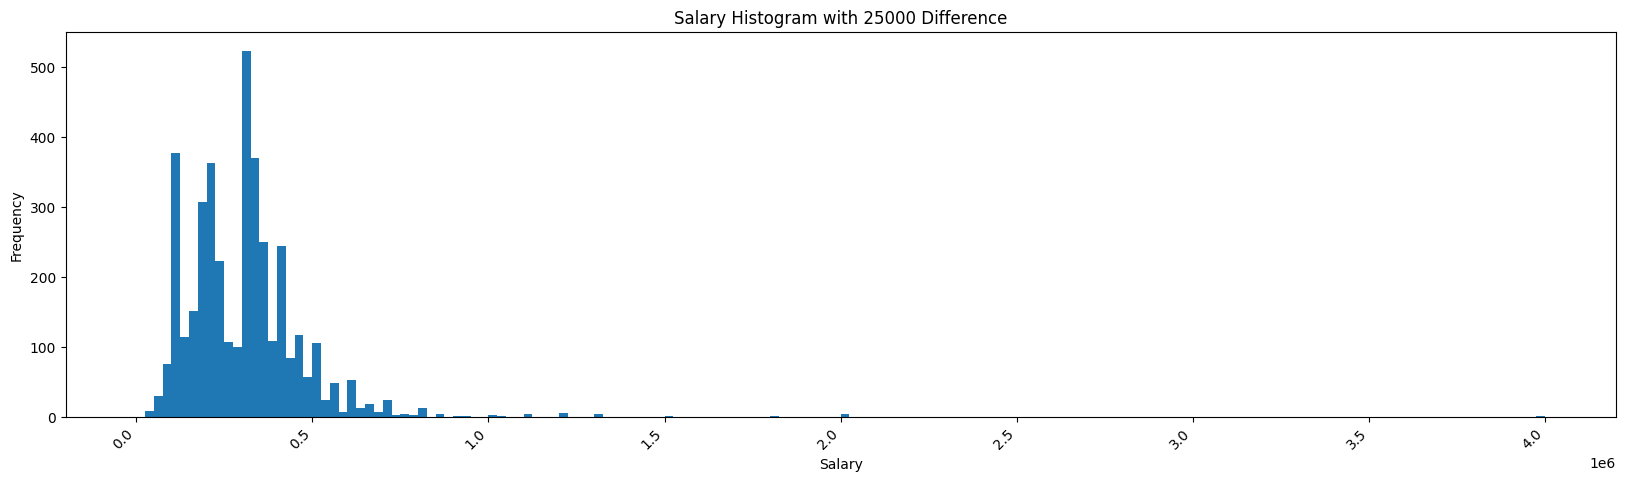

In [21]:
plt.figure(figsize=(20, 5))
plt.hist(df['salary'], bins=range(0, df['salary'].max() + 25000, 25000))
plt.xlabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.title('Salary Histogram with 25000 Difference')
plt.show()

In [22]:
bins = range(0, df['salary'].max() + 25000, 25000)
salary_binned = pd.cut(df['salary'], bins=bins)
salary_binned_counts = salary_binned.value_counts()
# less than 100
print("salary of minority (val count < 100) =", salary_binned_counts[salary_binned_counts < 100].shape[0])
# print only those whose count > 100
salary_binned_counts[salary_binned_counts > 100]

salary of minority (val count < 100) = 146


,count
salary,
"(175000, 200000]",498
"(300000, 325000]",419
"(275000, 300000]",356
"(325000, 350000]",307
"(100000, 125000]",272
"(225000, 250000]",246
"(375000, 400000]",212
"(125000, 150000]",196
"(200000, 225000]",193


- Majority earns salary in the range of [180000.00, 400000.00]

In [23]:
bins = range(0, df['salary'].max() + 25000, 25000)
salary_binned = pd.cut(df['salary'], bins=bins)
salary_binned_counts = salary_binned.value_counts(sort=False)

print(salary_binned_counts)

salary
(0, 25000]              0
(25000, 50000]         14
(50000, 75000]         31
(75000, 100000]       181
(100000, 125000]      272
                     ... 
(3875000, 3900000]      0
(3900000, 3925000]      0
(3925000, 3950000]      0
(3950000, 3975000]      0
(3975000, 4000000]      2
Name: count, Length: 160, dtype: int64


## Peak of Salary Groups

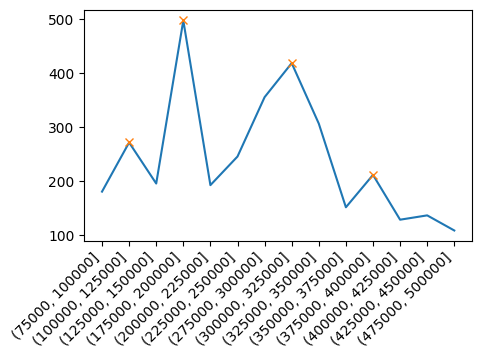

['(100000, 125000]', '(175000, 200000]', '(300000, 325000]', '(375000, 400000]']


In [24]:
from scipy.signal import find_peaks

x = salary_binned_counts[salary_binned_counts > 100]
peaks, _ = find_peaks(x.values, height=200)
plt.figure(figsize=(5, 3))
plt.plot(x.index.astype(str), x.values)
plt.plot(peaks, x.values[peaks], "x")
plt.xticks(rotation=45, ha='right')
plt.show()

print([ str(peak) for peak in x.index[peaks] ])

## Date of Joining Distribution w/ Months

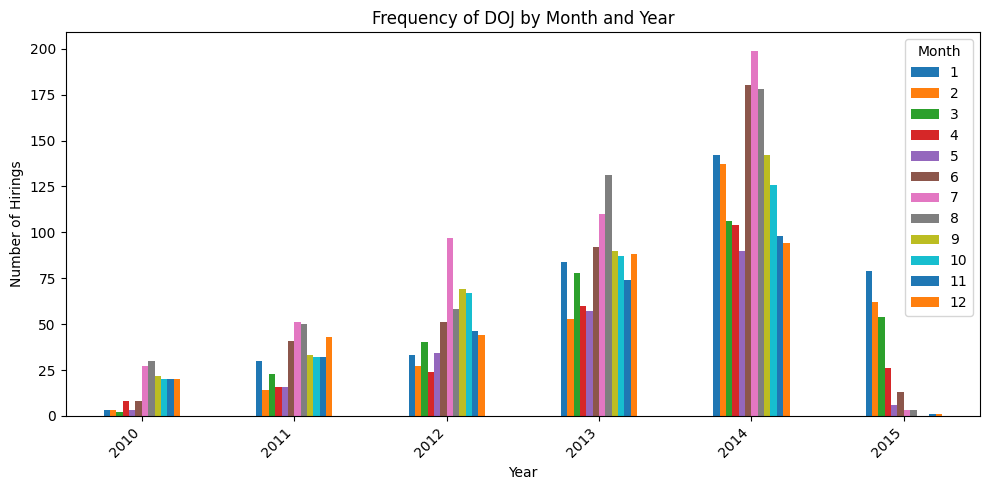

In [25]:
df['doj'] = pd.to_datetime(df['doj'])

doj_month = df['doj'].dt.month
doj_year = df['doj'].dt.year

freq_plot_data = df.groupby([df['doj'].dt.year, df['doj'].dt.month])['doj'].count().unstack()

# filter: count > 50
freq_plot_data = freq_plot_data[freq_plot_data.sum(axis=1) > 50]

freq_plot_data.plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of DOJ by Month and Year')
plt.xlabel('Year')
plt.ylabel('Number of Hirings')
plt.legend(title='Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bivariate

## Numeric v/s Numeric

In [26]:
CATEGORICAL = ['12_graduation', 'college_tier', 'college_city_tier', 'graduation_year']
CAN_HAVE_NEG_VAL = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

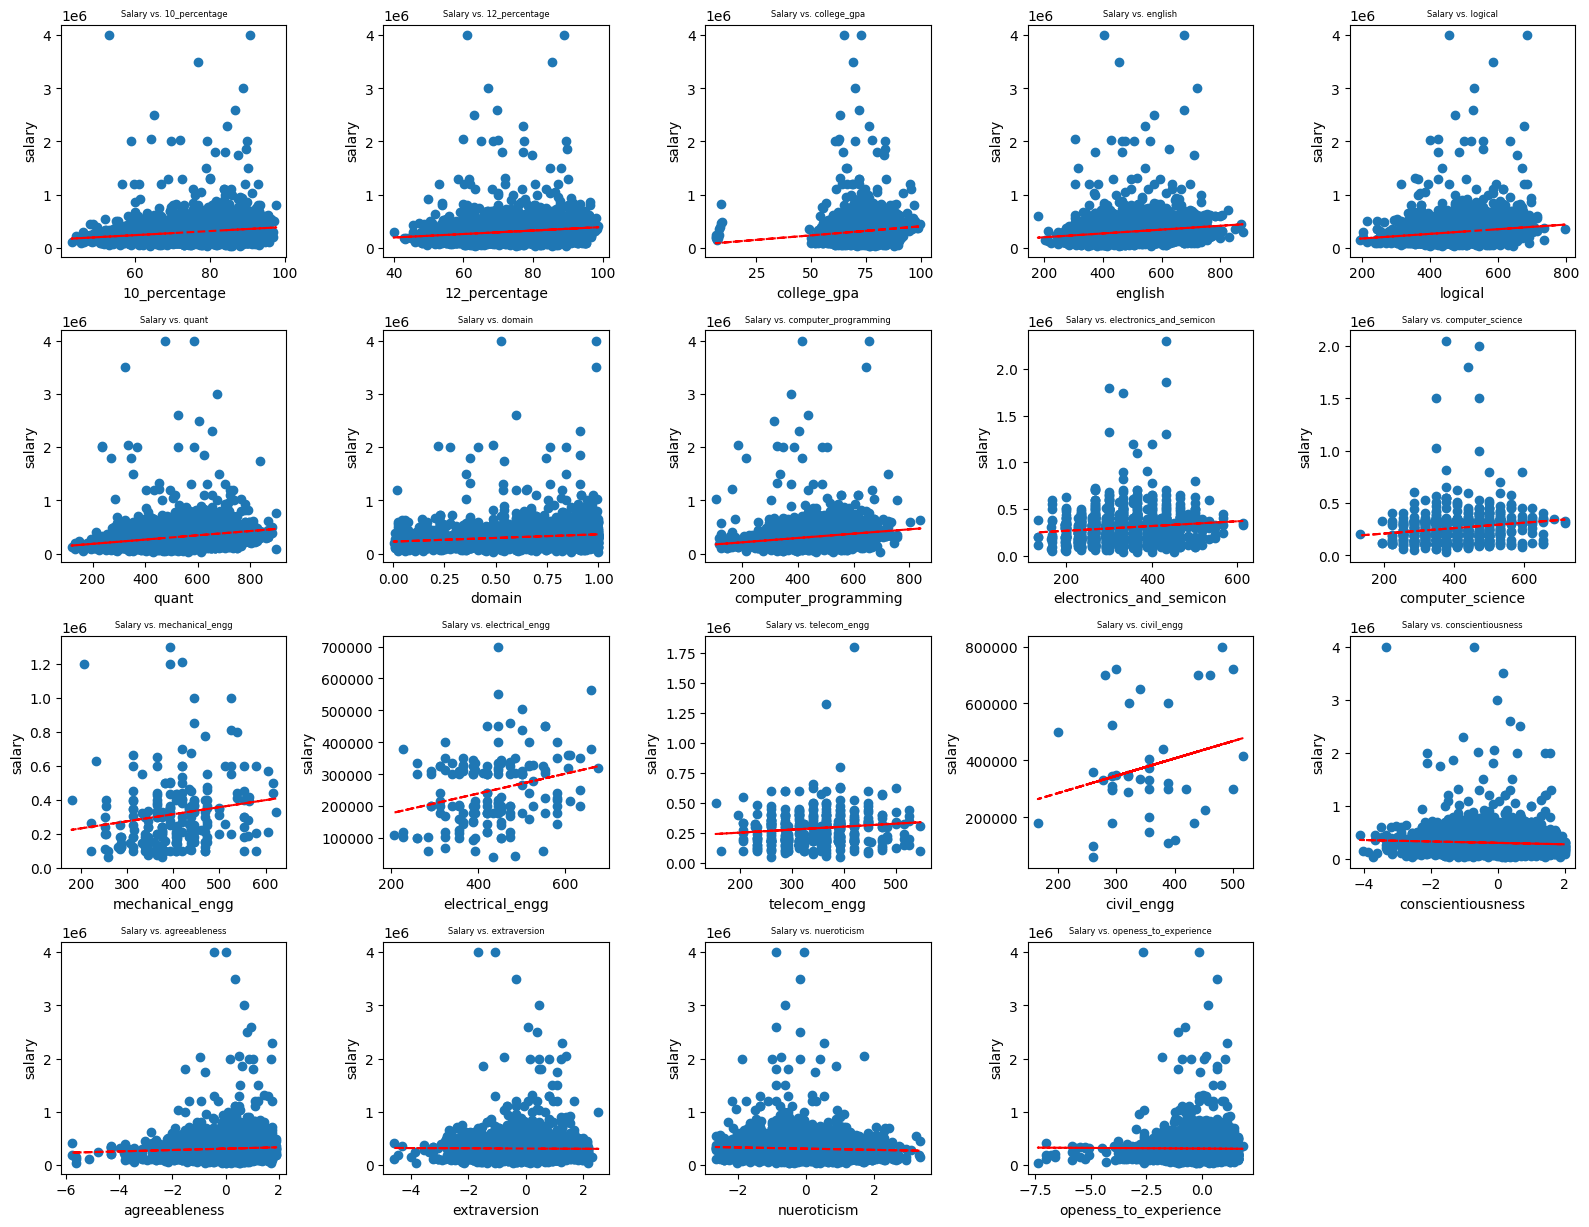

In [27]:
num_cols = df.select_dtypes(include=['number']).columns
cols_to_plot = [col for col in num_cols if col not in CATEGORICAL and col != 'salary']

rows = 5
fig, axes = plt.subplots(rows, 5, figsize=(16, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    plt.sca(axes[i])
    tmp_x, tmp_y = None, None
    # drop all -1 from df[col] if col not in CAN_HAVE_NEG_VAL, and remove corresponding salary
    if col not in CAN_HAVE_NEG_VAL:
        tmp_x = df[col][df[col] != -1]
        tmp_y = df['salary'][df[col] != -1]
    else:
        tmp_x = df[col]
        tmp_y = df['salary']
    # print
    # print(tmp_x.head())
    # print(tmp_y.head())
    # plot scatter plot
    plt.scatter(tmp_x, tmp_y)
    plt.xlabel(col)
    plt.ylabel('salary')
    plt.title(f'Salary vs. {col}', fontsize=6)
    # plot best fit line
    z = np.polyfit(tmp_x, tmp_y, 1)
    p = np.poly1d(z)
    plt.plot(tmp_x, p(tmp_x), "r--")

for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

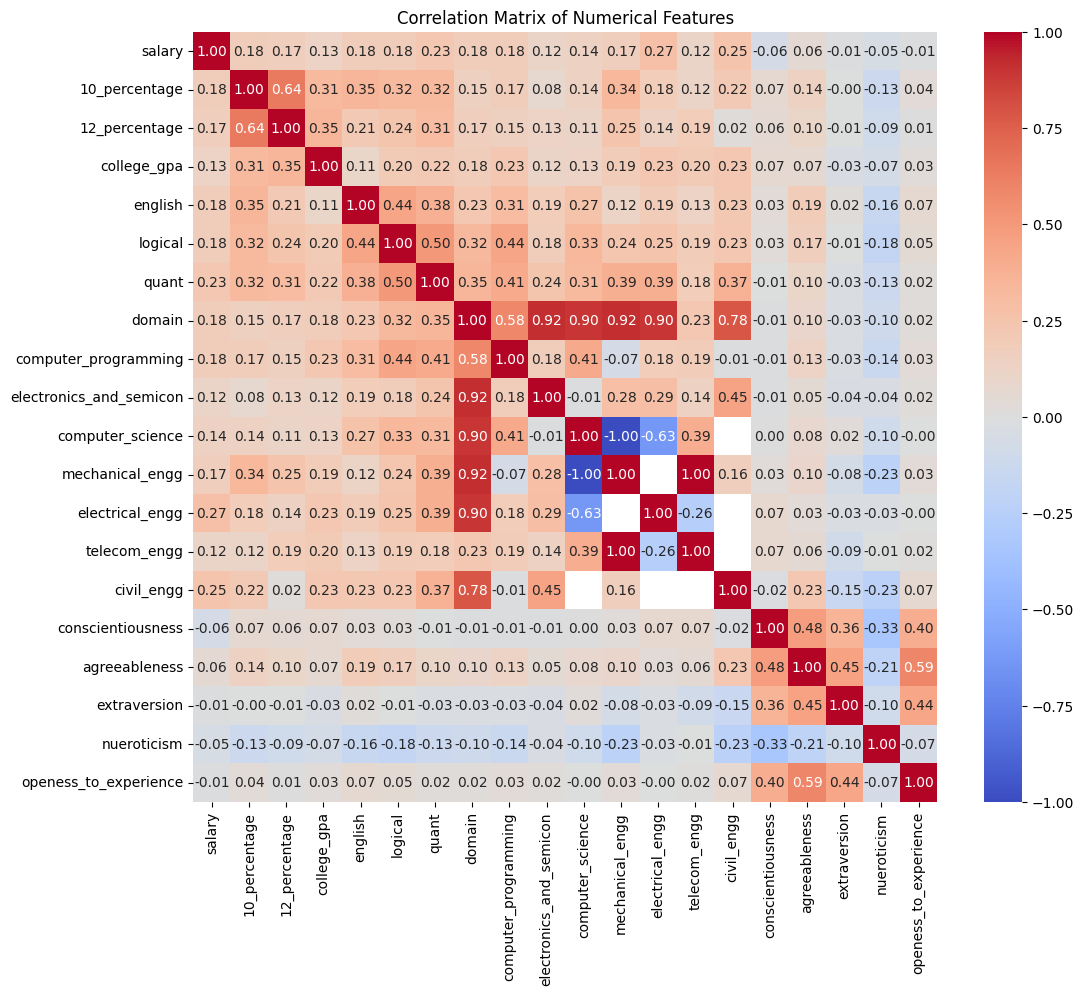

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

num_cols = df.select_dtypes(include=['number']).columns
cols_to_plot = [col for col in num_cols if col not in CATEGORICAL]

# copy df; replace -1 with NaN for cols not in CAN_HAVE_NEG_VAL
df_heatmap = df.copy()
for col in cols_to_plot:
    if col not in CAN_HAVE_NEG_VAL:
        df_heatmap[col] = df_heatmap[col].replace(-1, np.nan)

correlation_matrix = df_heatmap[cols_to_plot].corr()

# heatmp
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- Domain scores are directly proportional to scores in engineering with many having scores >= 0.3 (moderate to high correlation)
- Salary is not highly correlated with most columns
    - Salary is slightly correlated (+ve) to quants and some engineering scores (corr >= 0.25)
- Telecom Engineering scores are slightly correlated with most scores
    - However, it is moderately correlated (+ve) to Computer Engg. scores
- Neuroticism is (-ve) inversely correlated to most scores
    - Moderate inverse relation with Coscientiousness (as expected)
- Agreeableness is moderately correlated to Open to Experience

## Categorical v/s Numeric

In [29]:
tmpdef = df.copy()
score_cols = [
    '10_percentage', '12_percentage', 'college_gpa', 'english',
    'logical', 'quant', 'domain', 'computer_programming',
    'electronics_and_semicon', 'computer_science', 'mechanical_engg',
    'electrical_engg', 'telecom_engg', 'civil_engg'
]

CAN_HAVE_NEG_VAL = [
    'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
    'openess_to_experience'
]

# print min and max of score_cols
# print(tmpdef[score_cols].min())
# print(tmpdef[score_cols].max())

def percentage_scores_noneg(series):
    if series.max() <= 10:
        return (series / 10) * 100
    elif series.max() <= 100:
        return (series / 100) * 100
    elif series.max() <= 1000:
        return (series / 1000) * 100
    else:
        return series

tmpdef[score_cols] = tmpdef[score_cols].apply(percentage_scores_noneg)

# print(tmpdef[CAN_HAVE_NEG_VAL].min())
# print(tmpdef[CAN_HAVE_NEG_VAL].max())

# def percentage_scores_hasneg(series):
#     # shift scores to above 0 by adding with 10
#     series = series.apply(lambda x: x + 10)
#     if series.max() <= 10:
#         return (series / 10) * 100
#     elif series.max() <= 1000:
#         return (series / 1000) * 100
#     else:
#         return series

# tmpdef[CAN_HAVE_NEG_VAL] = tmpdef[CAN_HAVE_NEG_VAL].apply(percentage_scores_hasneg)

tmpdef['mean_subject_score'] = tmpdef[score_cols].mean(axis=1)
tmpdef.drop(columns=score_cols, inplace=True)
tmpdef.drop(columns=CAN_HAVE_NEG_VAL, inplace=True)
print(tmpdef['mean_subject_score'].min(), tmpdef['mean_subject_score'].max())

18.378571428571416 44.70099827410021


In [30]:
# remove all date cols and put year cols in place
for col in ['doj', 'dob', 'dol']:
    tmpdef[f'{col}_year'] = tmpdef[col].dt.year.astype(str)
    tmpdef.drop(columns=[col], inplace=True)

In [31]:
print(f"Unique DOL year: {tmpdef['dol_year'].nunique()}")
print(f"Unique DOJ year: {tmpdef['doj_year'].nunique()}")
print(f"Unique DOB year: {tmpdef['dob_year'].nunique()}")

Unique DOL year: 10
Unique DOJ year: 12
Unique DOB year: 17


In [32]:
categorical = CATEGORICAL + [ col for col in tmpdef.columns if tmpdef[col].dtype == 'object' and col not in CATEGORICAL ]
categorical

['12_graduation',
 'college_tier',
 'college_city_tier',
 'graduation_year',
 'designation',
 'job_city',
 'gender',
 '10_board',
 '12_board',
 'degree',
 'specialization',
 'college_state',
 'doj_year',
 'dob_year',
 'dol_year']

In [33]:
# interresting stuff
categorical = [
    'college_tier',
    # 'designation',
    # 'job_city',
    # 'college_state',
    'gender',
    'degree',
    # 'specialization',
    # 'doj_year',
    # 'dob_year',
    # 'dol_year'
]

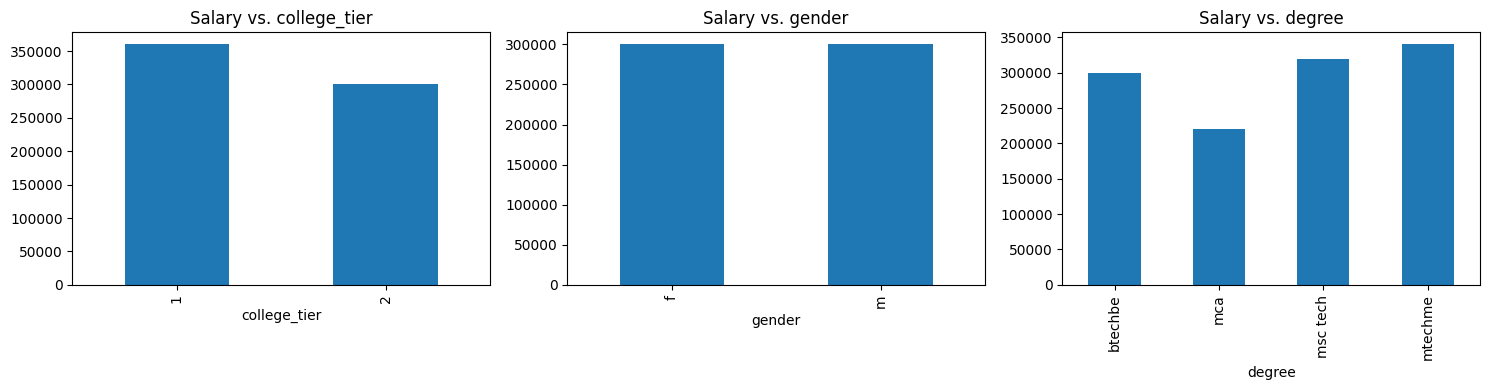

In [34]:
import matplotlib.pyplot as plt

rows = (len(categorical) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()

# salary_iqr = tmpdef['salary'].quantile(0.75) - tmpdef['salary'].quantile(0.25)
# salary_lower = tmpdef['salary'].quantile(0.25) - 1.5 * salary_iqr
# salary_upper = tmpdef['salary'].quantile(0.75) + 1.5 * salary_iqr
# df_no_outlier = tmpdef[(tmpdef['salary'] >= salary_lower) & (tmpdef['salary'] <= salary_upper)]

i = 0
for col in categorical:
  plt.sca(axes[i])
  df_grouped = tmpdef.groupby(col)['salary'].median()
  df_grouped.plot(kind='bar')
  plt.title(f'Salary vs. {col}')
  i += 1

for i in range(len(categorical), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


- Tier 1 college passout has higher median salary
- Median salary gap for gender is low
- M. Tech. has highest while MCA has lowest median salary

## Salary v/s YoL - YoJ

In [35]:
tmpdef['exp_yrs'] = pd.to_numeric(tmpdef['dol_year']) - pd.to_numeric(tmpdef['doj_year'])

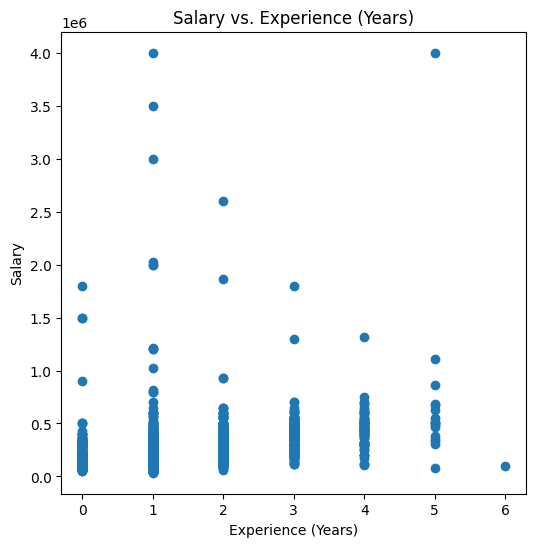

In [36]:
tmpdef_filtered = tmpdef[tmpdef['exp_yrs'] < 100]

plt.figure(figsize=(6, 6))
plt.scatter(tmpdef_filtered['exp_yrs'], tmpdef_filtered['salary'])
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Salary vs. Experience (Years)')
plt.show()

- No conclusions can be made

## Salary Prospects v/s Job City

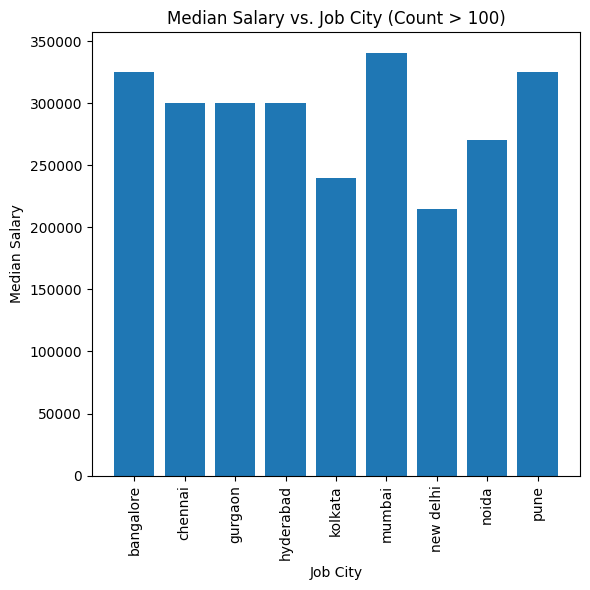

In [37]:
tmpdef_filtered = tmpdef.groupby('job_city')['salary'].agg(['median', 'count'])
tmpdef_filtered = tmpdef_filtered[tmpdef_filtered['count'] > 100]

plt.figure(figsize=(6, 6))
plt.bar(tmpdef_filtered.index, tmpdef_filtered['median'])
plt.xlabel('Job City')
plt.ylabel('Median Salary')
plt.title('Median Salary vs. Job City (Count > 100)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Median salary is high for Mumbai, Bangalore and Pune.
- Median salary is low for New Delhi and Kolkata.

## Job City v/s College State

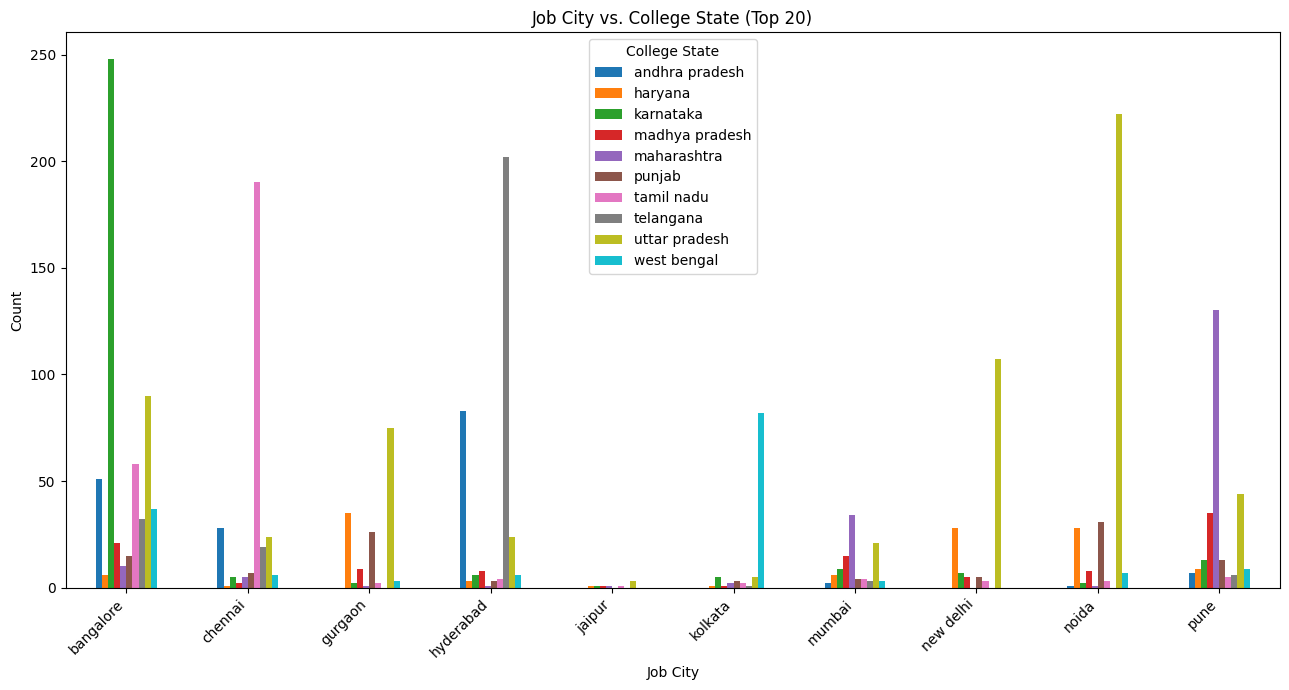

In [38]:
top_job_cities = df['job_city'].value_counts().nlargest(10).index
top_college_states = df['college_state'].value_counts().nlargest(10).index

df_filtered = df[df['job_city'].isin(top_job_cities) & df['college_state'].isin(top_college_states)]
df_grouped = df_filtered.groupby(['job_city', 'college_state'])['salary'].count().unstack()

df_grouped.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Job City')
plt.ylabel('Count')
plt.title('Job City vs. College State (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='College State')
plt.tight_layout()
plt.show()

- Visible trend is that most people go to college and enter work in the same state.
- Majority go to nearby cities for work. For eg, eople from Andhra Pradesh majorly move to cities in the south for work.
- In comparison to other cities, very few come to Kolkata or Jaipur for work from other states.

## Gender v/s Designation: More Females

In [40]:
specialization_gender_counts = df.groupby(['designation', 'gender'])['gender'].count().unstack()
specialization_gender_counts = specialization_gender_counts[specialization_gender_counts['f'] > 1]
specialization_gender_counts['m_f_ratio'] = specialization_gender_counts['m'] / specialization_gender_counts['f']
specialization_gender_counts = specialization_gender_counts[specialization_gender_counts['m'] <= specialization_gender_counts['f']]
specialization_gender_counts.sort_values('f', ascending=False, inplace=True)
print(specialization_gender_counts)

gender                               f    m  m_f_ratio
designation                                           
software quality assurance tester  9.0  8.0   0.888889
customer service                   9.0  8.0   0.888889
client services associate          7.0  6.0   0.857143
assistant professor                6.0  6.0   1.000000
web designer                       5.0  4.0   0.800000
it technician                      4.0  2.0   0.500000
business development executive     3.0  2.0   0.666667
etl developer                      3.0  2.0   0.666667
hr recruiter                       3.0  2.0   0.666667
engineer trainee                   3.0  1.0   0.333333
online marketing manager           2.0  1.0   0.500000
systems administrator              2.0  1.0   0.500000
sql developer                      2.0  2.0   1.000000
assistant programmer               2.0  1.0   0.500000
senior business analyst            2.0  1.0   0.500000
sales associate                    2.0  2.0   1.000000
quality as

- The designation with more number of females include software quality assurance tester, customer service, client services associate and web designer (male + female count >= 5)

# Research Questions

#### Q1 Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [46]:
studydf = df[df['specialization'].str.contains('computer')]
for item in sorted(studydf['designation'].unique()):
    print(item)

account executive
account manager
admin assistant
administrative coordinator
administrative support
android developer
application developer
application engineer
apprentice
aspnet developer
assistant engineer
assistant manager
assistant professor
assistant programmer
assistant software engineer
assistant store manager
assistant system engineer
assistant system engineer trainee
assistant systems engineer
associate developer
associate engineer
associate software developer
associate software engg
associate software engineer
associate system engineer
associate test engineer
automation engineer
branch manager
business analyst
business analyst consultant
business consultant
business development executive
business development manager
business intelligence analyst
business system analyst
business systems analyst
business systems consultant
c developer
client services associate
cloud engineer
computer faculty
customer service
customer service representative
data analyst
data entry operator
data 

In [47]:
studydf = studydf[
    (studydf['designation'].str.lower().str.contains('software eng')) |
    (studydf['designation'].str.lower().str.contains('programmer analyst')) |
    (studydf['designation'].str.lower().str.contains('hardware eng')) |
    (studydf['designation'].str.lower().str.contains('associate eng'))
]

studydf['designation'] = studydf['designation'].str.replace('software enginner', 'software engineer')
studydf['designation'] = studydf['designation'].str.replace('trainee software engineer', 'software engineer trainee')
studydf['designation'] = studydf['designation'].str.replace('jr software engineer', 'junior software engineer')

<ipython-input-47-a7769ae8d163>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studydf['designation'] = studydf['designation'].str.replace('software enginner', 'software engineer')
<ipython-input-47-a7769ae8d163>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studydf['designation'] = studydf['designation'].str.replace('trainee software engineer', 'software engineer trainee')
<ipython-input-47-a7769ae8d163>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [48]:
q1 = studydf['salary'].quantile(0.25)
q3 = studydf['salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

cleanstudydf = studydf[(studydf['salary'] >= lower_bound) & (studydf['salary'] <= upper_bound)]

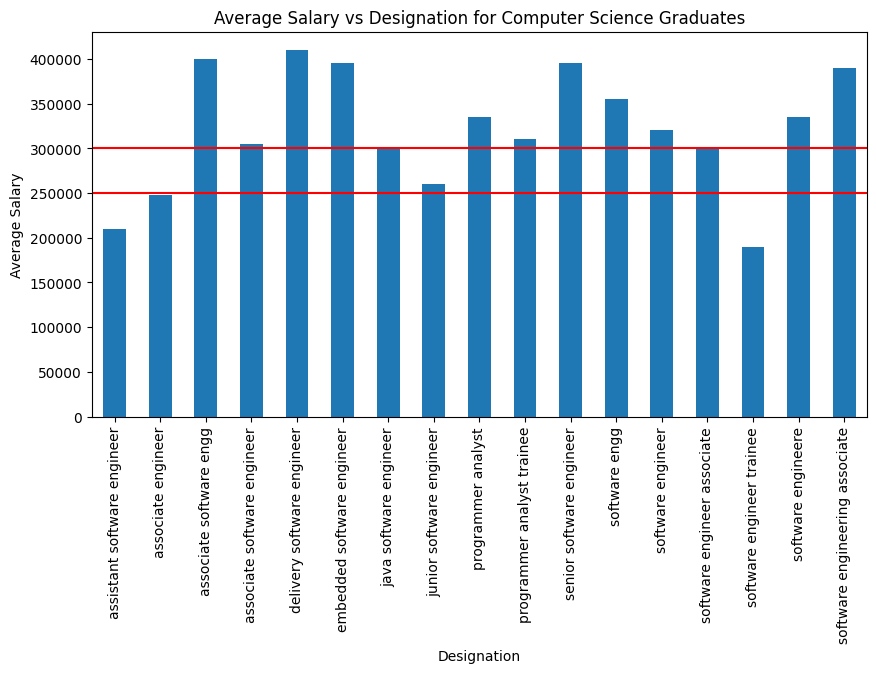

In [49]:
plt.figure(figsize=(10, 5))
cleanstudydf.groupby('designation')['salary'].median().plot(kind='bar')
plt.title('Average Salary vs Designation for Computer Science Graduates')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
# draw a line parallel to x axis with y=0.2
plt.axhline(y=0.25*1e6, color='r', linestyle='-')
plt.axhline(y=0.3*1e6, color='r', linestyle='-')
plt.show()

Judging by the bar graph, there is some truth to the claim. Positions for which the claim is not valid are Assistant Software Engineer, Associate Engineer and Software Engineer Trainee.

#### Q2 Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [50]:
specialization_gender_counts = df.groupby(['specialization', 'gender'])['gender'].count().unstack()
specialization_gender_counts['m_f_ratio'] = specialization_gender_counts['m'] / specialization_gender_counts['f']
specialization_gender_counts = specialization_gender_counts[specialization_gender_counts['m'] <= specialization_gender_counts['f']]
print(specialization_gender_counts)

gender                    f    m  m_f_ratio
specialization                             
biotechnology           9.0  6.0   0.666667
computer science        1.0  1.0   1.000000
industrial engineering  1.0  1.0   1.000000


- Biotechnology has more females than males